In [51]:
import librosa
import os
from dotenv import load_dotenv
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

## Set folders paths

In [77]:
load_dotenv()
AUDIO_FOLDER = os.getenv("AUDIO_FOLDER")
SAMPLE_RATE = os.getenv("SAMPLING_RATE")

## Load Audio Files

In [4]:
audio_files = {}
for root, _, files in os.walk(AUDIO_FOLDER):
    if root != AUDIO_FOLDER:
        name = os.path.basename(root)
        for file in files:
            if name in audio_files.keys():
                audio_files[name].append(os.path.join(root, file))
            else:
                audio_files[name] = [os.path.join(root, file)]

# Data show

## Classes

In [5]:
print("Audio classes: ", ",\n".join(audio_files.keys()), sep="\n")

Audio classes: 
hiphop,
rock,
jazz,
blues,
disco,
classical,
country,
pop,
reggae,
metal


Number of samples of each class <br>
jazz.00054.wav - was damaged so I delate it

In [6]:
for class_name in audio_files.keys():
    print(f"Class: {class_name}: {len(audio_files[class_name])}")

Class: hiphop: 100
Class: rock: 100
Class: jazz: 99
Class: blues: 100
Class: disco: 100
Class: classical: 100
Class: country: 100
Class: pop: 100
Class: reggae: 100
Class: metal: 100


## Play example audio

In [7]:
ipd.Audio(audio_files["rock"][0])

# Audio statistic

In [8]:
audio = {}

for key in audio_files.keys():
    audio[key] = []
    for path in audio_files[key]:
        data, sr = librosa.load(path, sr=SAMPLE_RATE)
        audio[key].append((data, sr))


In [88]:
lengths = pd.DataFrame([])
for key in audio.keys():
    class_lengths = np.array([len(sample[0]) for sample in audio[key]])
    if len(class_lengths) < 100:
        mean_length = np.mean(class_lengths)
        class_lengths = np.append(class_lengths, [mean_length] * (100 - len(class_lengths)))
    lengths[key] = class_lengths

In [90]:
# Create an empty DataFrame
lengths = pd.DataFrame([])

# Find the maximum length of the arrays
max_length = max(len(audio[key]) for key in audio.keys())

for key in audio.keys():
    class_lengths = np.array([len(sample[0]) for sample in audio[key]], dtype=float)
    # Pad the array with NaN values to match the maximum length
    padded_lengths = np.pad(
        class_lengths, (0, max_length - len(class_lengths)), constant_values=np.nan
    )
    lengths[key] = padded_lengths

In [91]:
lengths.describe()

,hiphop,rock,jazz,blues,disco,classical,country,pop,reggae,metal
count,100.000000,100.000000,99.000000,100.0,100.000000,100.000000,100.000000,100.0,100.00000,100.00000
mean,663468.240000,662010.580000,662234.505051,661794.0,661934.800000,662116.100000,662027.760000,661504.0,661622.90000,661596.80000
std,4380.745071,1290.502566,1704.945827,0.0,1257.321058,1583.648195,1189.911745,0.0,143.35021,135.95959
min,660000.000000,661408.000000,661676.000000,661794.0,661344.000000,661344.000000,661100.000000,661504.0,661504.00000,661504.00000
25%,661794.000000,661794.000000,661794.000000,661794.0,661504.000000,661794.000000,661794.000000,661504.0,661504.00000,661504.00000
50%,661794.000000,661794.000000,661794.000000,661794.0,661504.000000,661794.000000,661794.000000,661504.0,661504.00000,661504.00000
75%,661794.000000,661794.000000,661794.000000,661794.0,661794.000000,661794.000000,661794.000000,661504.0,661794.00000,661794.00000
max,675808.000000,670340.000000,672100.000000,661794.0,668140.000000,672282.000000,669680.000000,661504.0,661794.00000,661794.00000


In [89]:
lengths.describe()

,hiphop,rock,jazz,blues,disco,classical,country,pop,reggae,metal
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.00000,100.00000
mean,663468.240000,662010.580000,662234.505051,661794.0,661934.800000,662116.100000,662027.760000,661504.0,661622.90000,661596.80000
std,4380.745071,1290.502566,1696.313134,0.0,1257.321058,1583.648195,1189.911745,0.0,143.35021,135.95959
min,660000.000000,661408.000000,661676.000000,661794.0,661344.000000,661344.000000,661100.000000,661504.0,661504.00000,661504.00000
25%,661794.000000,661794.000000,661794.000000,661794.0,661504.000000,661794.000000,661794.000000,661504.0,661504.00000,661504.00000
50%,661794.000000,661794.000000,661794.000000,661794.0,661504.000000,661794.000000,661794.000000,661504.0,661504.00000,661504.00000
75%,661794.000000,661794.000000,661794.000000,661794.0,661794.000000,661794.000000,661794.000000,661504.0,661794.00000,661794.00000
max,675808.000000,670340.000000,672100.000000,661794.0,668140.000000,672282.000000,669680.000000,661504.0,661794.00000,661794.00000


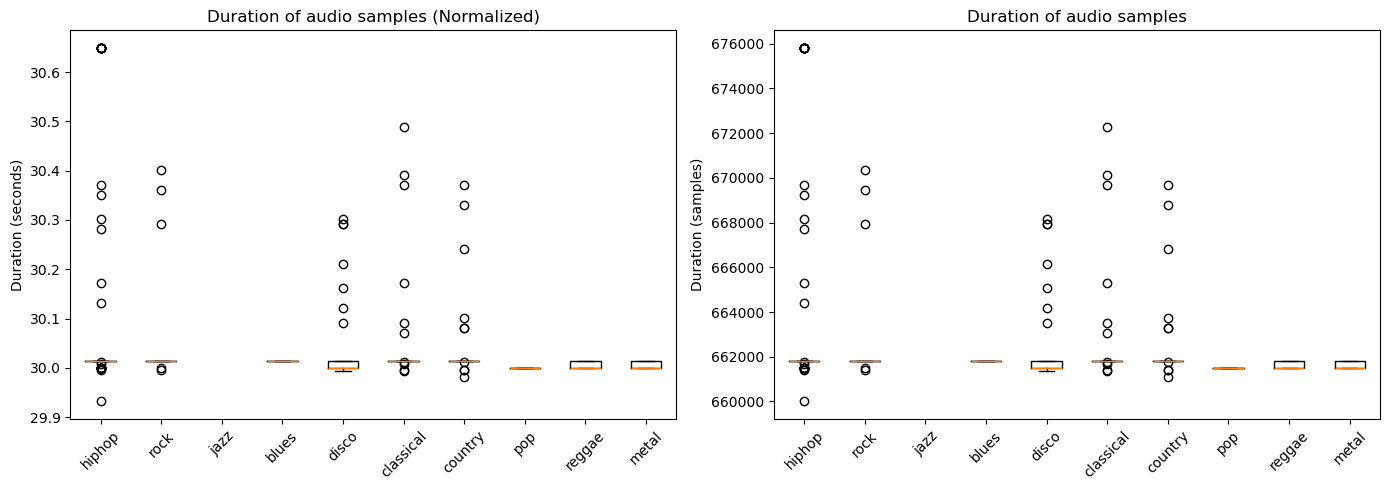

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

normalized_lengths = lengths / SAMPLE_RATE
ax1.boxplot((normalized_lengths).values, tick_labels=lengths.columns)
ax1.set_title("Duration of audio samples (Normalized)")
ax1.set_ylabel("Duration (seconds)")
ax1.set_xticklabels(lengths.columns, rotation=45)

ax2.boxplot(lengths, tick_labels=lengths.columns)
ax2.set_title("Duration of audio samples")
ax2.set_ylabel("Duration (samples)")
ax2.set_xticklabels(lengths.columns, rotation=45)

plt.tight_layout()
plt.show()